In [18]:
import cellmesh
import matplotlib.pyplot as plt
import numpy as np

## CellMeSH statistics

### Number of Cells

In [6]:
all_cell_ids = cellmesh.get_all_cell_id_names(include_cell_components=True,
                                              include_cell_lines=True, include_chromosomes=True)
len(all_cell_ids)

570

In [8]:
subset_cell_ids = cellmesh.get_all_cell_id_names(include_cell_components=False,
                                                include_cell_lines=False,
                                                include_chromosomes=False)
len(subset_cell_ids)

292

There are 570 total entries, and 292 entries after excluding cell components (organelles and the like), cell lines, and chromosomes.

### Number of Genes

In [11]:
human_genes = cellmesh.get_all_genes(species='human')
print('number of human genes:', len(human_genes))

number of human genes: 20138


In [12]:
mouse_genes = cellmesh.get_all_genes(species='mouse')
print('number of mouse genes:', len(mouse_genes))

number of mouse genes: 27322


In [13]:
worm_genes = cellmesh.get_all_genes(species='c_elegans')
print('number of c. elegans genes:', len(worm_genes))

number of c. elegans genes: 20135


### Distribution of Genes Per Cell (human)

In [53]:
human_genes_per_cell = {}
for cell_id, cell_name in subset_cell_ids:
    human_genes_per_cell[cell_id, cell_name] = cellmesh.get_cell_genes_pmids(cell_id, species='human',
                                                                             threshold=0)
human_nonzero_genes_per_cell = {k: len(v) for k, v in human_genes_per_cell.items()}
genes_count = np.array([v for k, v in human_nonzero_genes_per_cell.items()])
cell_id_names = np.array([k for k, v in human_nonzero_genes_per_cell.items()])

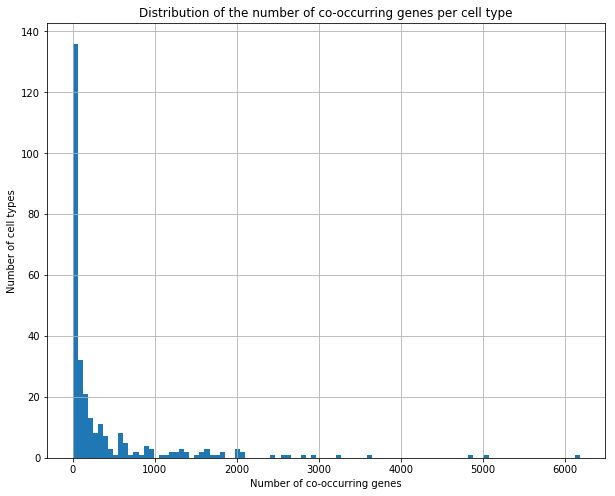

In [54]:
plt.figure(figsize=(10, 8))
plt.title('Distribution of the number of co-occurring genes per cell type')
plt.hist(genes_count, bins=100)
plt.grid()
plt.xlabel('Number of co-occurring genes')
plt.ylabel('Number of cell types')
plt.show()

In [55]:
print('mean genes per cell:', np.mean(genes_count))
print('median genes per cell:', np.median(genes_count))

mean genes per cell: 397.88013698630135
median genes per cell: 72.5


In [56]:
print('number of cells with zero genes:', (genes_count == 0).sum())
print('number of cells with one gene:', (genes_count == 1).sum())
print('number of cells with more than one gene:', (genes_count > 1).sum())

number of cells with zero genes: 19
number of cells with one gene: 13
number of cells with more than one gene: 260


### Extrema

In [70]:
# top 10 cell types by gene count
gene_count_indices = np.argsort(genes_count)[::-1]
print('cell with most genes:')
for x, y in zip(cell_id_names[gene_count_indices[:10]], genes_count[gene_count_indices[:10]]):
    print('Cell type:', x, 'gene count:', y)
print()

# cell types with zero genes
print('cells with zero genes:')
print(cell_id_names[genes_count == 0])



cell with most genes:
Cell type: ['D005347' 'Fibroblasts'] gene count: 6186
Cell type: ['D009474' 'Neurons'] gene count: 5013
Cell type: ['D004847' 'Epithelial Cells'] gene count: 4852
Cell type: ['D013601' 'T-Lymphocytes'] gene count: 3592
Cell type: ['D008264' 'Macrophages'] gene count: 3233
Cell type: ['D013234' 'Stem Cells'] gene count: 2953
Cell type: ['D009000' 'Monocytes'] gene count: 2803
Cell type: ['D042783' 'Endothelial Cells'] gene count: 2603
Cell type: ['D001402' 'B-Lymphocytes'] gene count: 2589
Cell type: ['D008214' 'Lymphocytes'] gene count: 2415

cells with zero genes:
[['D009047' 'Motor Neurons, Gamma']
 ['D000072977' 'Oogonial Stem Cells']
 ['D000074523' 'Suprachiasmatic Nucleus Neurons']
 ['D000078422' 'Allogeneic Cells']
 ['D000071037' 'Place Cells']
 ['D001339' 'Autonomic Fibers, Preganglionic']
 ['D006057' 'Golgi-Mazzoni Corpuscles']
 ['D002856' 'Chromatophores']
 ['D001078' 'APUD Cells']
 ['D000072956' 'Adult Germline Stem Cells']
 ['D066294' 'Commissural Inter